##### Explain the project:
Predicting the ration of the persons that prezent higher chances of getting heart attack.
-> Data: 'framingham.csv' from the 'databases' folder

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sea 
import matplotlib.mlab as mlab

In [5]:
# goal: predict wether the paciant has 10-year risk(is in the data) of future coronary hear 
# dataset
disease_data = pd.read_csv('../database/framingham.csv')
# drop the column 'education' as it does not count for getting the disease
disease_data.drop(['education'], inplace = True, axis=1)
disease_data.rename(columns={'male': 'Sex_male'}, inplace=True)
# Handling the missing data (drop the NaN/Null)
disease_data.dropna(axis=0, inplace=True)
print(disease_data.head(10), disease_data.shape)
print(disease_data.TenYearCHD.value_counts())
print(disease_data.columns)


   Sex_male  age  currentSmoker  ...  heartRate  glucose  TenYearCHD
0         1   39              0  ...       80.0     77.0           0
1         0   46              0  ...       95.0     76.0           0
2         1   48              1  ...       75.0     70.0           0
3         0   61              1  ...       65.0    103.0           1
4         0   46              1  ...       85.0     85.0           0
5         0   43              0  ...       77.0     99.0           0
6         0   63              0  ...       60.0     85.0           1
7         0   45              1  ...       79.0     78.0           0
8         1   52              0  ...       76.0     79.0           0
9         1   43              1  ...       93.0     88.0           0

[10 rows x 15 columns] (3751, 15)
TenYearCHD
0    3179
1     572
Name: count, dtype: int64
Index(['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       '

C:\Users\pcojocar\AppData\Local\Temp\ipykernel_22704\1598194771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(x='TenYearCHD', data=disease_data, palette='BuGn_r')


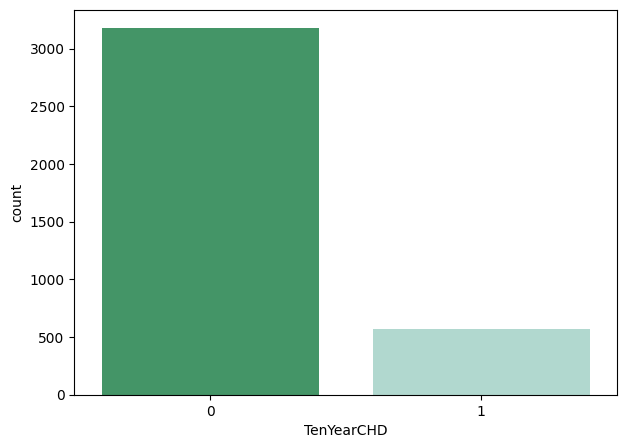

In [6]:
# splitting data 
X = np.asarray(disease_data[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_data['TenYearCHD'])

# normalization of the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train the model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=4)
# explore the data to gain insides
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sea.countplot(x='TenYearCHD', data=disease_data, palette='BuGn_r')
plt.show()

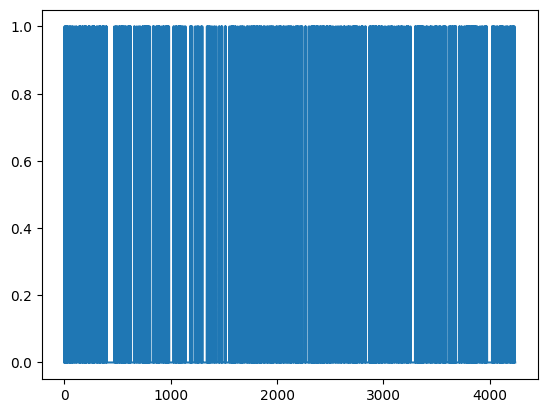

In [7]:
laste = disease_data['TenYearCHD'].plot()
plt.show(laste)

Accuracy of the model: 0.8490230905861457


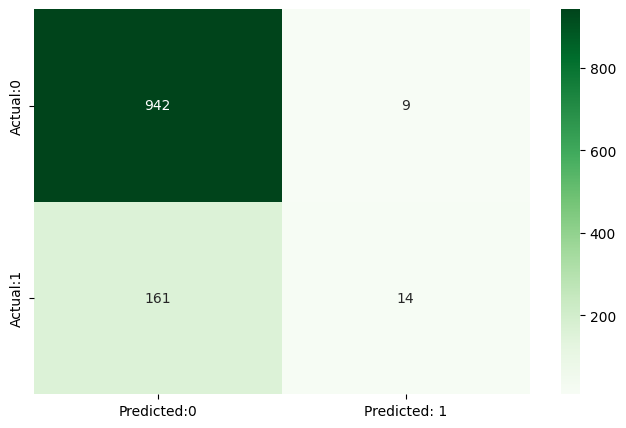

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [8]:
# using the model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
pred = logreg.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy of the model: {accuracy_score(ytest, pred)}')

cm = confusion_matrix(ytest, pred)
conf_matrix = pd.DataFrame(data=cm, columns= ['Predicted:0', 'Predicted: 1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sea.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')

plt.show()
print('The details for confusion matrix is =')
print(classification_report(ytest, pred))